In [1]:
from sklearn import svm,metrics,model_selection
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import feature

# LOADING DATA

In [2]:
data = pd.read_csv("train.csv")
data.head()

FileNotFoundError: File b'train.csv' does not exist

In [6]:
images = data.ix[:, 1:].as_matrix().reshape((-1,28,28))
labels = data.ix[:, 0].as_matrix()

In [4]:
def show_img(image):
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

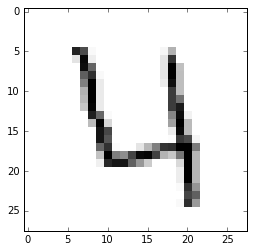

In [5]:
show_img(images[3])

## Setup training and testing data

In [35]:
sample_df = data.sample(13000)
training_df = sample_df[:10000]
testing_df = sample_df[10000:]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14169,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13534,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4928,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
training_data = training_df.ix[:, 1:].as_matrix()
training_labels = training_df.ix[:, 0].as_matrix()

In [105]:
test_data = testing_df.ix[:, 1:].as_matrix()
test_labels = testing_df.ix[:, 0].as_matrix()

# Feature Extraction

## HOG function

In [92]:
from sklearn.externals import joblib
from skimage.feature import hog
from time import time

In [93]:
def hog_features_extraction(features):
    t0 = time()
    list_hog_fd = []
    for feature in features:
        fd = hog(feature.reshape((28,28)), orientations = 9, pixels_per_cell=(7,7), cells_per_block=(1,1), visualise=False)
    #     print(fd.shape)
        list_hog_fd.append(fd)

    hog_features = np.array(list_hog_fd,'float64')
    print(hog_features.shape)
    print('HOG Extraction time consuming:', (time()-t0))
    return hog_features

## HOG Extraction

In [95]:
train_HOG_features = hog_features_extraction(training_data)

(10000, 144)
HOG Extraction time consuming: 3.6602530479431152


# Classification

In [97]:
t0 = time()
classifier = svm.SVC(decision_function_shape="ovr", gamma=1)
classifier.fit(train_HOG_features, training_labels)
print('Classification Consuming:',(time()-t0))

Classification Consuming: 37.897517919540405


### Testing

In [98]:
test_HOG_features = hog_features_extraction(test_data)

(3000, 144)
HOG Extraction time consuming: 1.4295589923858643


In [99]:
PredictedResult = classifier.predict(test_HOG_features)

In [106]:
TrueP = np.sum(PredictedResult == test_labels)

In [107]:
float(TrueP/3000)

0.908

# Dimensionality Reduction

## Configuration

In [116]:
n_neighbors = 30
dimension_size = 120
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=dimension_size,
                                      method='standard')

In [ ]:
clf_pca = mani

## Reduction

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from time import time

In [117]:

t0 = time()
training_features_lle = clf.fit_transform(train_HOG_features)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
print("Time Consuming:%d"%(time()-t0))


Done. Reconstruction error: 0.0415185
Time Consuming:145


In [ ]:
t0 = time()
training_features_lle = clf.fit_transform(train_HOG_features)
print("Time Consuming:%d"%(time()-t0))

In [118]:
# training_features_lle = DimensionalityReduction(train_HOG_features)
print(training_features_lle.shape)

(10000, 120)


# Classification With Reduction

In [119]:
t0=time()
classifier_LLE = svm.SVC(decision_function_shape="ovr", gamma=1)
classifier_LLE.fit(training_features_lle, training_labels)
print('SVM time consuming:', time()-t0)

SVM time consuming: 33.790212869644165


In [ ]:
t0=time()
classifier_LLE = svm.SVC(decision_function_shape="ovr", gamma=1)
classifier_LLE.fit(training_features_lle, training_labels)
print('SVM time consuming:', time()-t0)

# Test With Reduction

In [120]:

print("Computing LLE embedding")
t0 = time()
test_features_lle = clf.transform(test_HOG_features)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
print("Time Consuming:%d"%(time()-t0))


Computing LLE embedding
Done. Reconstruction error: 0.0415185
Time Consuming:12


In [121]:
# test_features_lle =DimensionalityReduction(test_HOG_features)
print(test_features_lle.shape)
PredictedResult_LLE = classifier_LLE.predict(test_features_lle)

(3000, 120)


In [81]:
PredictedResult_LLE

array([9, 4, 4, ..., 1, 4, 8])

In [82]:
test_labels

array([7, 8, 1, ..., 1, 5, 1])

In [83]:
training_labels

array([7, 1, 7, ..., 9, 5, 9])

In [124]:
result = np.sum(PredictedResult_LLE == test_labels)

In [125]:
float(result/3000)

0.7473333333333333

# END